In [9]:
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats

构造一个N(0,1)的RandomWalk序列

In [10]:
s = pd.Series(stats.norm.rvs(loc=0, scale=1, size=10))

In [13]:
s1 = s.cumsum()

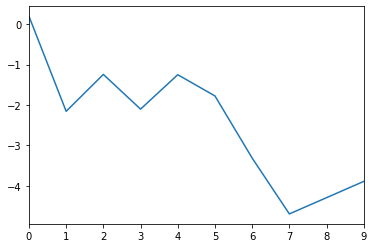

In [14]:
s1.plot()

In [16]:
with pm.Model() as model:
    e = pm.Exponential('e', 1)
#     tau = pm.DiscreteUniform('tau', 1,10)
    
    rw = pm.GaussianRandomWalk('rw', sigma=e, shape=len(s1), observed=s1)
    
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [e]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 1602.84it/s]


/home/latila/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.50821407, 1.39614489, 0.69735055, 0.21223712, 0.05342023,
        0.01588169, 0.00288758, 0.        , 0.        , 0.00144379]),
 array([0.64153427, 0.98784503, 1.33415579, 1.68046655, 2.02677731,
        2.37308807, 2.71939884, 3.0657096 , 3.41202036, 3.75833112,
        4.10464188]),
 <a list of 10 Patch objects>)

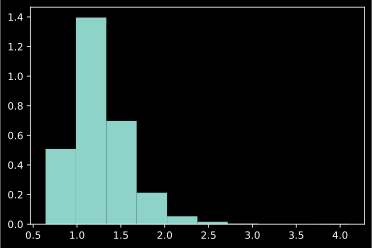

In [18]:
plt.hist(trace['e'], bins=10, normed=True)

In [23]:
rw.tag.test_value

array([ 0.1977885 , -2.15763315, -1.24359629, -2.10329011, -1.25073369,
       -1.77665487, -3.31575716, -4.69987247, -4.29711038, -3.89404665])

In [25]:
l = np.arange(10)
with pm.Model() as model:
    lam1 = pm.Exponential("lam1", 1)
    lam2 = pm.Exponential('lam2', 1)
    swith_point = pm.DiscreteUniform('swith_point', lower=l.min(), upper=l.max())
    lam = pm.math.switch(swith_point > l, lam2, lam1)

In [26]:
lam.tag.test_value

array([0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718])

In [27]:
swith_point.tag.test_value

4

In [ ]:
plt.vlines()

In [31]:
np.log(299.0000)

5.700443573390687

In [17]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

In [5]:
e

e

In [11]:
e.tag.test_value

array(0.69314718)

In [19]:
import scipy.stats as stats
stats.poisson.rvs(1, size=(10,1))

array([[1],
       [1],
       [0],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1]])

In [20]:
N=1
lam1 = 1
lam2 = 3
data1 = stats.poisson.rvs(lam1, size=(N,1))
data2 = stats.poisson.rvs(lam2, size=(N,1))

In [27]:
x=y=np.linspace(.01, 5, 100)

In [48]:
likelyx = np.array([stats.poisson.pmf(data1[:,0], _x) for _x in x]).prod(axis=1)
likelyy = np.array([stats.poisson.pmf(data2[:,0], _y) for _y in y]).prod(axis=1)

In [49]:
likelyx.shape

(100,)

In [50]:
likelyx[:,None].shape

(100, 1)

In [51]:
likelyy[None,:].shape

(1, 100)

In [57]:
likelyx[0]

4.9502491687458457e-05

In [61]:
np.dot(likelyx[:,None], likelyy[None,:])[0,0] == likelyx[0]*likelyy[0]

True

# Mixture Data

In [2]:
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

In [3]:
df = pd.read_csv('dataset/mixture_data.csv', header=None)

df.columns = ['value']

In [4]:
k = df.sample(frac=.3)

In [5]:
import theano.tensor as T
with pm.Model() as model:
    p = pm.Uniform('p', 0, 1)
    
    choice = pm.Categorical('choice', T.stack([p, 1-p]), 
                            shape=k.index.size,
                           testval=np.random.randint(0, 2, k.index.size))
    mu = pm.Normal('mu', np.array([120, 100]), np.array([10,10]), shape=2)
    sigma = pm.Normal('sigma', np.array([10,10]), np.array([5,5]), shape=2)
    obs = pm.Normal('obs', 
                    pm.Deterministic('mu_', mu[choice]), 
                    pm.Deterministic('sigma_',sigma[choice]), observed=k)
    

In [ ]:
with model:
    step1 = pm.Metropolis(vars=[p, mu, sigma])
    step2 = pm.CategoricalGibbsMetropolis(vars=[choice])
    trace = pm.sample(2_000, step=[step1, step2])

Sequential sampling (2 chains in 1 job)
CompoundStep
>CompoundStep
>>Metropolis: [sigma]
>>Metropolis: [mu]
>>Metropolis: [p]
>CategoricalGibbsMetropolis: [choice]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:41<00:00, 59.81it/s]


In [11]:
trace['mu'][:,0]

array([169.98368528, 169.98368528, 169.98368528, 169.98368528,
       169.98368528, 170.24476933, 170.24476933, 169.84993261,
       169.84993261, 169.84993261, 169.97575293, 169.97575293,
       169.97575293, 169.97575293, 169.97575293, 169.97575293,
       169.97575293, 169.97575293, 169.97575293, 169.97575293])

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([ 90.2024372 ,  92.55208266,  94.90172812,  97.25137358,
         99.60101905, 101.95066451, 104.30030997, 106.64995543,
        108.9996009 , 111.34924636, 113.69889182]),
 <a list of 10 Patch objects>)

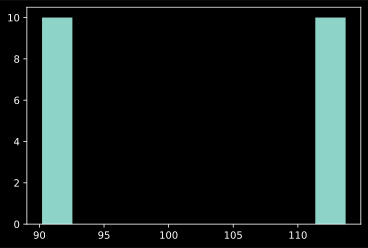

In [13]:
plt.hist(trace['mu'][:,1])

In [23]:
trace['choice'].shape

(20, 300)

In [33]:
l = np.array([   -0.0053,   -0.0289,   -0.0283,   -0.0147,    0.0083,   -0.0473,   -0.0156,    0.0011,   -0.0325,    0.0220,   -0.0246,    0.0279,   -0.0092,   -0.0109,   -0.0063,   -0.0288,    0.0056])

In [36]:
l[11]

0.0279

In [37]:
l[5]

-0.0473

In [35]:
np.argmax(l)

11